# In this R Notebook we will reproduce Figure 4

## Loading the data

In [2]:
#install.packages("mclust")
#install.packages("igraph")


source('../R/SyntheticNetOscope.R')
outputfile='../datasynthetic/figs/figure4.pdf'
 
 file0="adjMatrixQvalue_0.csv"
 file1 = 'adjMatrixQvalue_1.csv'
 file2 = 'adjMatrixQvalue_2.csv'
 file3 = 'adjMatrixQvalue_3.csv'
 file4 = 'adjMatrixQvalue_4.csv'
 fl=c(file0,file1,file2,file3,file4)
 path='../datasynthetic/'
 out=matrix(data=NA,nrow=5,ncol=3)

#Run SyntheticNet on each single adj matrix

 for (i in c(1:length(fl))){
 filename=paste(path,fl[i],sep='')
 out[i,]= SyntheticNet(filename)
 
 }
 colnames(out)=c('WALKTRAP','FASTGREEDY','INFOMAP')

[1] "../datasynthetic/adjMatrixQvalue_0.csv"
[1] "1-WALKTRAP"
         True
labelPred   0   1   2   3
       0  789   0   0   0
       6   15  60   0   0
       15   9   0  60   0
       16   7   0   0  60
 WALKTRAP 
0.8815294 
[1] "2-FASTGREEDY"
         True
labelPred   0   1   2   3
        0 761   0   0   0
        1  18  60   0   0
        2  18   0  60   0
        3  13   0   0  60
        4  10   0   0   0
FASTGREEDY 
 0.7884114 
[1] "3-INFOMAP"
         True
labelPred   0   1   2   3
        0 795   0   0   0
        1   6  60   0   0
        2   5   0  60   0
        3   4   0   0  60
        4  10   0   0   0
  INFOMAP 
0.9059857 
[1] "../datasynthetic/adjMatrixQvalue_1.csv"
[1] "1-WALKTRAP"
         True
labelPred   0   1   2   3
       0  789   0   0   0
       13  13  60   0   0
       37  11   0   0  60
       38   7   0  60   0
 WALKTRAP 
0.8814954 
[1] "2-FASTGREEDY"
         True
labelPred   0   1   2   3
        0 735   0   0   0
        1  12   0  60   0
        2  1

## Plotting the data

pdf 
  2

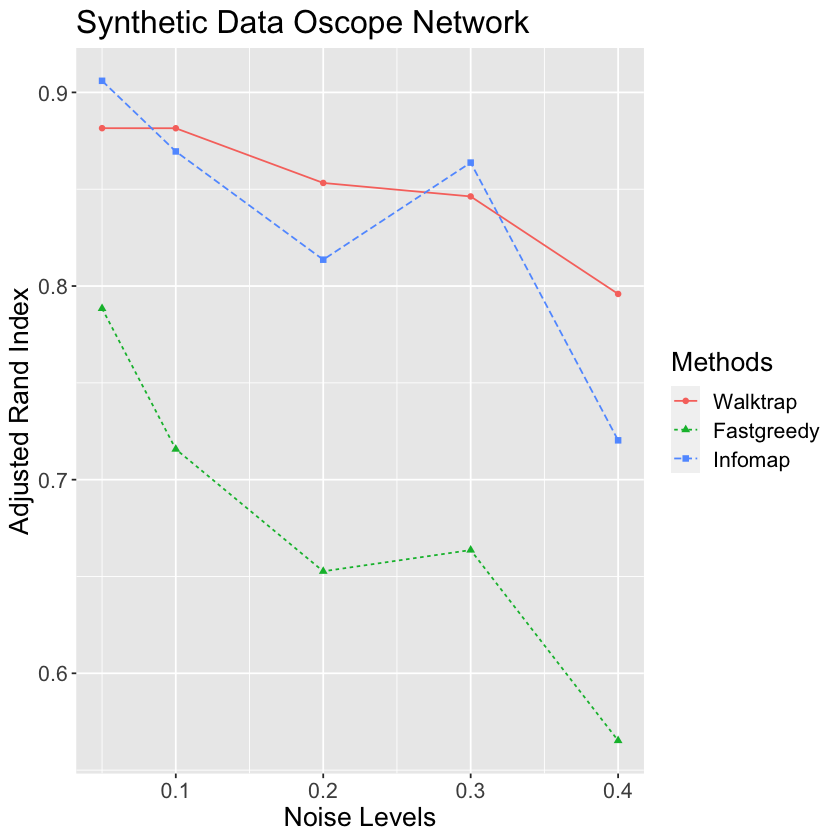

In [4]:
#plot 
library(ggplot2)
x <- c(0.05, 0.1, 0.2, 0.3, 0.4)
xtag=paste('-',x,sep='')
y1=out[,1]
y2=out[,2]
y3=out[,3]
df <- data.frame(x, y1,y2,y3)


####NEW PLOT FOR REVISION#####
# Create the data frames

df1 <- data.frame(x, y = y1, Type = as.factor("Walktrap"))
df2 <- data.frame(x, y = y2, Type = as.factor("Fastgreedy"))
df3 <- data.frame(x, y = y3, Type = as.factor("Infomap"))

# Merge the data frames
df.merged <- rbind(df1, df2, df3)

# Create the interaction

# Compute the number of types and methods
nb.types <- nlevels(df.merged$Type)

# Set the legend title
legend.title <- "Methods"
Methods=df.merged$Type
library(extrafont)

# Initialize the plot
g <- ggplot(df.merged, aes(x,
                           y,
                           colour =Methods,
                           linetype = Methods,
                           shape = Methods)) + geom_line() + geom_point()
# Here is the magic
g <- g + scale_color_discrete(legend.title)
g <- g + scale_size(guide='none')+labs(title="Synthetic Data Oscope Network",
                                       x ="Noise Levels", y = "Adjusted Rand Index")+  theme(text=element_text(size=16,  family="ArialMT"))

# Display the plot

#g1=g + scale_x_discrete(labels=c("0.1" = "[-]0.1", "0.1" = "[-]0.1","0.2" = "[-]0.2","0.3" = "[-]0.3","0.4" = "[-]0.4"), limits=c(0.1,0.2,0.3,0.4))
#loadfonts()

print(g)

pdf(outputfile)
g
dev.off()


